In [1]:
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_values(event_path, scalar, smooth=0, batch_ratio=8, cut_off_step=78000):
    # Initialize an event accumulator
    event_acc = EventAccumulator(event_path)

    # Load all events
    event_acc.Reload()

    # Get the scalar events that were logged
    scalar_events = event_acc.Scalars(scalar)

    # Initialize lists for the wall time, step number, and value
    w_times, steps, values = [], [], []

    # Loop through scalar events once and extract data
    for event in scalar_events:
        w_times.append(event.wall_time)
        steps.append(event.step)
        values.append(event.value)

    # event_acc = EventAccumulator(event_path.replace('version_0', 'from0'))
    # event_acc.Reload()
    # scalar_events = event_acc.Scalars(scalar)
    # last_step = steps[-1]
    # for event in scalar_events:
    #     w_times.append(event.wall_time)
    #     steps.append(event.step + last_step)
    #     values.append(event.value)

    # Now you should rescale the first part of the data

    # Assuming values and steps are numpy arrays, convert them to pandas series
    values_series = pd.Series(values)

    # Compute the exponential moving average
    values_smooth = values_series.ewm(alpha=(1 - smooth)).mean()

    return steps, values_smooth


/var/folders/m1/mwsfhs9s3lj_v878yxkbk1s40000gn/T/ipykernel_3106/1458057154.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


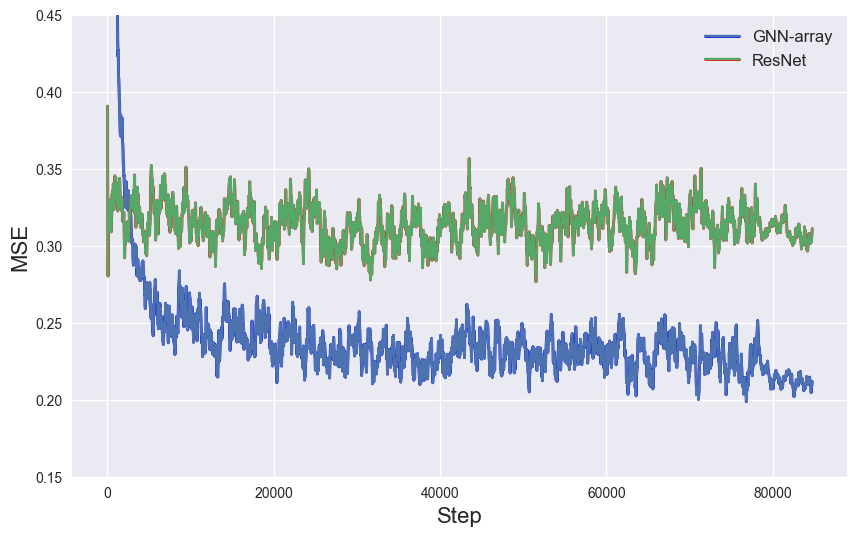

In [60]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib
plt.rcdefaults()
# Use the seaborn style
plt.style.use('seaborn')

# Increase the default figure size
fig = plt.figure(figsize=(10, 6))

# Load your data
steps,graph_mse  = get_values('tb_logs_new/tb_logs/graph_array/version_3', 'MSE (value)', smooth=0.9)
steps, array_mse = get_values('tb_logs/array_array/version_0', 'MSE (value)', smooth=0.9)

# Add the path effects to your plot
line1, = plt.plot(steps, graph_mse, label='GNN-array', path_effects=[pe.Stroke(linewidth=2, foreground='b'), pe.Normal()])
line2, = plt.plot(steps, array_mse, label='ResNet', path_effects=[pe.Stroke(linewidth=2, foreground='r'), pe.Normal()])

# Label the axes and increase label font sizes
plt.xlabel('Step', fontsize=16)
plt.ylabel('MSE', fontsize=16)

# Set the range of y-axis
plt.ylim(0.15,0.45)

# Add a title
# plt.title('Comparison of MSE between GNN-array and ResNet', fontsize=18)

# Add a legend with increased font size
plt.legend(loc='upper right', fontsize=12)

# Add a grid
plt.grid(True)

# Use LaTeX rendering for text
matplotlib.rcParams['text.usetex'] = True
# Show the plot

fig.savefig("MSE_arrayVsResnet.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/m1/mwsfhs9s3lj_v878yxkbk1s40000gn/T/ipykernel_3106/2676859163.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


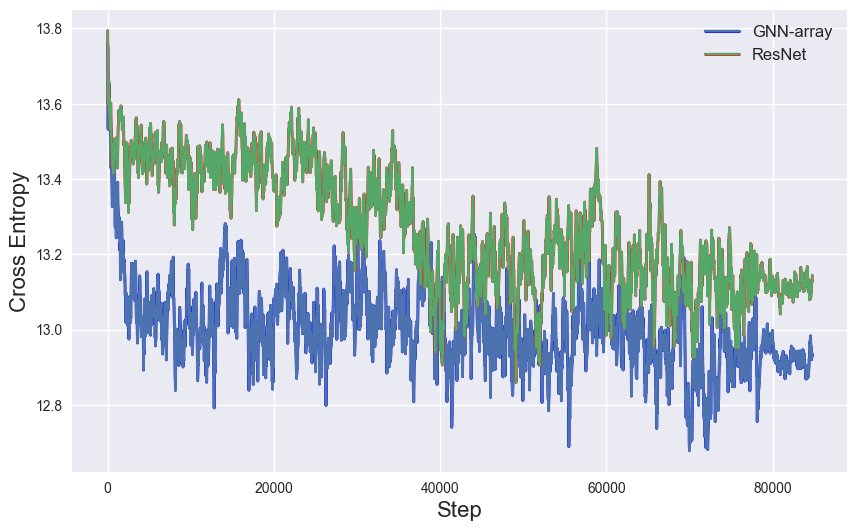

In [61]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib
plt.rcdefaults()
# Use the seaborn style
plt.style.use('seaborn')

# Increase the default figure size
fig = plt.figure(figsize=(10, 6))

# Load your data
steps,graph_cse  = get_values('tb_logs/graph_array/version_0', 'Cross Entropy (policy)', smooth=0.9)
steps, array_cse = get_values('tb_logs/array_array/version_0', 'Cross Entropy (policy)', smooth=0.9)

# Add the path effects to your plot
line1, = plt.plot(steps, graph_cse, label='GNN-array', path_effects=[pe.Stroke(linewidth=2, foreground='b'), pe.Normal()])
line2, = plt.plot(steps, array_cse, label='ResNet', path_effects=[pe.Stroke(linewidth=2, foreground='r'), pe.Normal()])

# Label the axes and increase label font sizes
plt.xlabel('Step', fontsize=16)
plt.ylabel('Cross Entropy', fontsize=16)

# Add a title
# plt.title('GNN-array and ResNet Cross Entropy ', fontsize=18)

# Add a legend with increased font size
plt.legend(loc='upper right', fontsize=12)

# Add a grid
plt.grid(True)

# Use LaTeX rendering for text
matplotlib.rcParams['text.usetex'] = True
fig.savefig("CE_arrayVsResnet.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


/var/folders/m1/mwsfhs9s3lj_v878yxkbk1s40000gn/T/ipykernel_3106/476361214.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


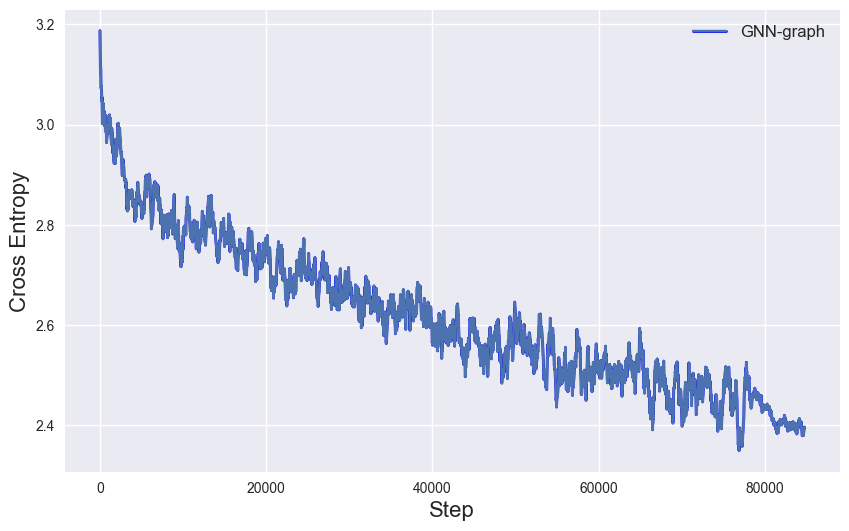

In [62]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib
plt.rcdefaults()
# Use the seaborn style
plt.style.use('seaborn')

# Increase the default figure size
fig = plt.figure(figsize=(10, 6))

# Load your data
steps,cse  = get_values('tb_logs/graph_graph/version_0', 'Cross Entropy (policy)', smooth=0.9)

# Add the path effects to your plot
line1, = plt.plot(steps, cse, label='GNN-graph', path_effects=[pe.Stroke(linewidth=2, foreground='b'), pe.Normal()])

# Label the axes and increase label font sizes
plt.xlabel('Step', fontsize=16)
plt.ylabel('Cross Entropy', fontsize=16)

# Add a title
# plt.title('Comparison of MSE between GNN-array and ResNet', fontsize=18)

# Add a legend with increased font size
plt.legend(loc='upper right', fontsize=12)

# Add a grid
plt.grid(True)

# Use LaTeX rendering for text
matplotlib.rcParams['text.usetex'] = True
fig.savefig("graph_CE.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()




/var/folders/m1/mwsfhs9s3lj_v878yxkbk1s40000gn/T/ipykernel_3106/1603149103.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


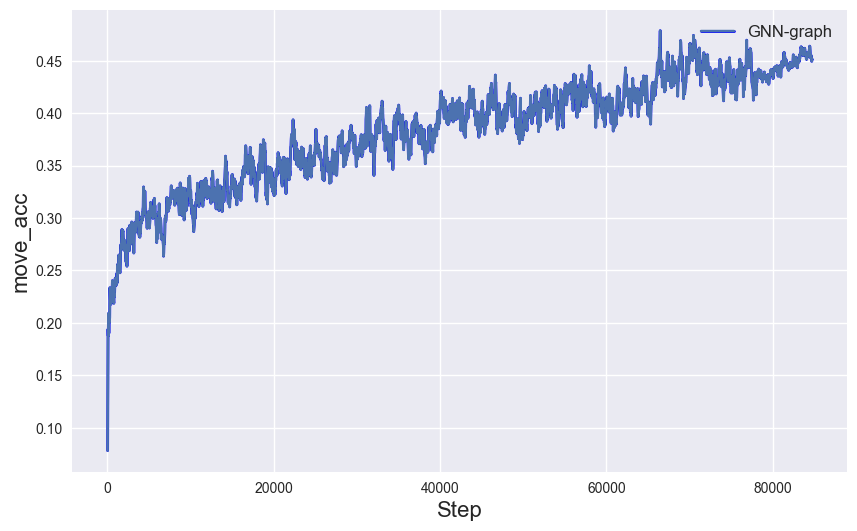

In [63]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib
plt.rcdefaults()
# Use the seaborn style
plt.style.use('seaborn')

# Increase the default figure size
fig = plt.figure(figsize=(10, 6))

# Load your data
steps,acc  = get_values('tb_logs/graph_graph/version_0', 'move_acc', smooth=0.9)

# Add the path effects to your plot
line1, = plt.plot(steps, acc, label='GNN-graph', path_effects=[pe.Stroke(linewidth=2, foreground='b'), pe.Normal()])

# Label the axes and increase label font sizes
plt.xlabel('Step', fontsize=16)
plt.ylabel('move_acc', fontsize=16)

# Add a title
# plt.title('Comparison of MSE between GNN-array and ResNet', fontsize=18)

# Add a legend with increased font size
plt.legend(loc='upper right', fontsize=12)

# Add a grid
plt.grid(True)

# Use LaTeX rendering for text
matplotlib.rcParams['text.usetex'] = True
fig.savefig("graph_acc.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()




/var/folders/m1/mwsfhs9s3lj_v878yxkbk1s40000gn/T/ipykernel_3106/371093075.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


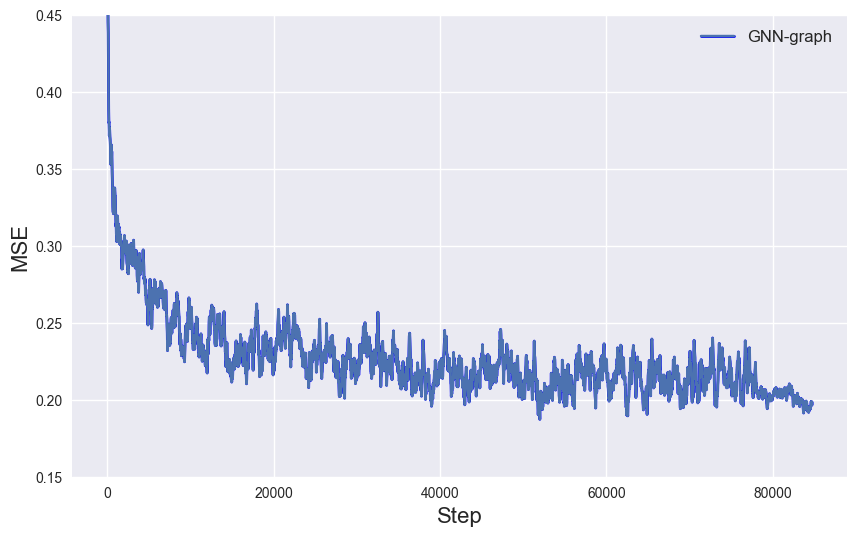

In [64]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib
plt.rcdefaults()
# Use the seaborn style
plt.style.use('seaborn')

# Increase the default figure size
fig = plt.figure(figsize=(10, 6))

# Load your data
steps,mse  = get_values('tb_logs/graph_graph/version_0', 'MSE (value)', smooth=0.9)

# Add the path effects to your plot
line1, = plt.plot(steps, mse, label='GNN-graph', path_effects=[pe.Stroke(linewidth=2, foreground='b'), pe.Normal()])

# Label the axes and increase label font sizes
plt.xlabel('Step', fontsize=16)
plt.ylabel('MSE', fontsize=16)

# Add a title
# plt.title('Comparison of MSE between GNN-array and ResNet', fontsize=18)

# Add a legend with increased font size
plt.legend(loc='upper right', fontsize=12)

# Add a grid
plt.grid(True)
plt.ylim(0.15,0.45)
# Use LaTeX rendering for text
matplotlib.rcParams['text.usetex'] = True
fig.savefig("graph_mse.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


